----
# **SEMANTIC ANALYSIS**
-----

## **IMPORT LIBRARIES**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier


## **1. DATASET DETAILS AND EXPLORATORY DATA ANALYSIS (EDA)**

### **1.1 DATASET OVERVIEW**

In [4]:
# Load the dataset
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [5]:
true.describe()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,21417,21416,21417,21417,1,1,1,1
unique,20825,21191,3,717,1,1,1,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",Trump and Clinton: 37 percent would support Cl...,followed by 31 percent for Trump and 9 percent...,politicsNews,"January 28, 2016"
freq,14,8,11271,182,1,1,1,1


In [6]:
true = true.drop(columns=[col for col in true.columns if "Unnamed" in col])

In [7]:
fake.describe()

,title,text,subject,date
count,23481,22849,23481,23481
unique,17903,17451,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,Watch:,News,"May 10, 2017"
freq,6,5,9050,46


### **1.2 CHECK FOR MISSING VALUES**

In [8]:
true.isnull().sum(),fake.isnull().sum()

(title      0
 text       1
 subject    0
 date       0
 dtype: int64,
 title        0
 text       632
 subject      0
 date         0
 dtype: int64)

In [9]:
true.duplicated().sum(),fake.duplicated().sum()

(206, 3)

### **1.3 DATA CLEANING**

In [10]:
true1 = true.drop(['text'] , axis = 1)
fake1 = fake.drop(['text'] , axis = 1)

In [11]:
fake1= fake.drop_duplicates()
true1= true.drop_duplicates()

In [12]:
fake = fake.dropna(subset=["text"])
true = true.dropna(subset=["text"])

### **1.4 FEATURE ENGINEERING**

In [13]:
fake["label"] = "Fake"
true["label"] = "True"

In [14]:
fake.info(),true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22849 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    22849 non-null  object
 1   text     22849 non-null  object
 2   subject  22849 non-null  object
 3   date     22849 non-null  object
 4   label    22849 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21416 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
 4   label    21416 non-null  object
dtypes: object(5)
memory usage: 1003.9+ KB


(None, None)

In [15]:
News = pd.concat([fake, true], ignore_index=True)

In [16]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44265 entries, 0 to 44264
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44265 non-null  object
 1   text     44265 non-null  object
 2   subject  44265 non-null  object
 3   date     44265 non-null  object
 4   label    44265 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [17]:
News.describe()

,title,text,subject,date,label
count,44265,44265,44265,44265,44265
unique,38280,38642,9,1686,2
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",Fake
freq,14,8,11270,185,22849


### **1.5 OUTLIER REMOVAL**

In [18]:
unique_subjects = News['subject'].unique()
print(unique_subjects)

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews'
 'about 37 percent of voters would support Sanders compared with 30 percent for Trump and 8 percent for Bloomberg.  "If Cruz and Clinton win the nominations'
 'worldnews']


In [19]:
# Remove the specific row using a pattern match
News = News[~News['subject'].str.contains('about 37 percent of voters would support Sanders compared with 30 percent for Trump and 8 percent for Bloomberg.  "If Cruz and Clinton win the nominations', na=False)]
true = true[~true['subject'].str.contains('about 37 percent of voters would support Sanders compared with 30 percent for Trump and 8 percent for Bloomberg.  "If Cruz and Clinton win the nominations', na=False)]

# Verify the removal
print(News['subject'].value_counts())
print(true['subject'].value_counts())
print(fake['subject'].value_counts())

politicsNews       11270
worldnews          10145
News                9050
politics            6433
left-news           4309
Government News     1498
US_News              782
Middle-east          777
Name: subject, dtype: int64
politicsNews    11270
worldnews       10145
Name: subject, dtype: int64
News               9050
politics           6433
left-news          4309
Government News    1498
US_News             782
Middle-east         777
Name: subject, dtype: int64


### **1.4 VISUALIZING**

In [20]:
# Text and Title Length Distributions
fake['text_length'] = fake['text'].apply(len)
true['text_length'] = true['text'].apply(len)
fake['title_length'] = fake['title'].apply(len)
true['title_length'] = true['title'].apply(len)

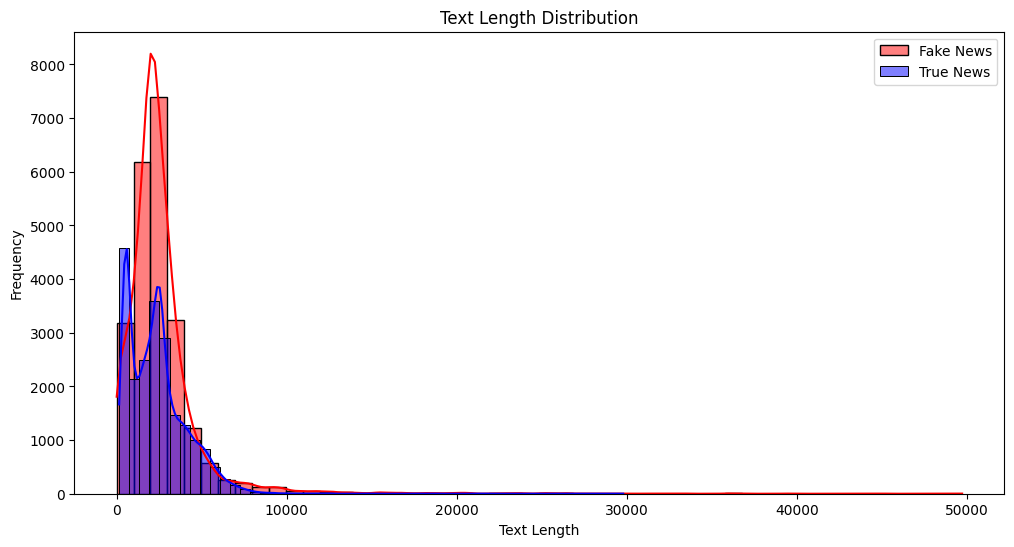

In [21]:
# Distribution of Text Lengths for Fake and True News
plt.figure(figsize=(12, 6))
sns.histplot(fake['text_length'], label='Fake News', color='red', kde=True, bins=50, alpha=0.5)
sns.histplot(true['text_length'], label='True News', color='blue', kde=True, bins=50, alpha=0.5)
plt.legend()
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


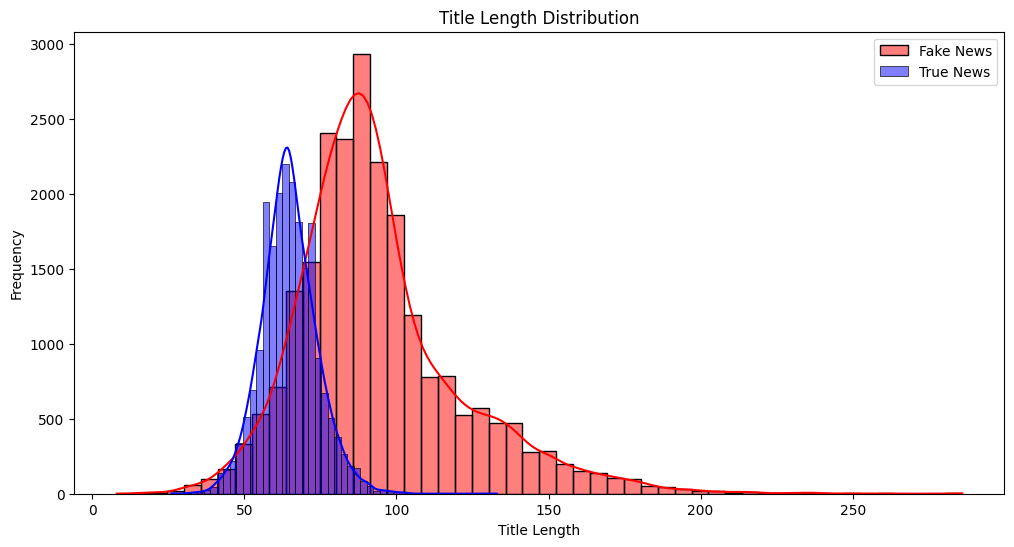

In [22]:
# Distribution of Title Lengths for Fake and True News
plt.figure(figsize=(12, 6))
sns.histplot(fake['title_length'], label='Fake News', color='red', kde=True, bins=50, alpha=0.5)
sns.histplot(true['title_length'], label='True News', color='blue', kde=True, bins=50, alpha=0.5)
plt.legend()
plt.title('Title Length Distribution')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

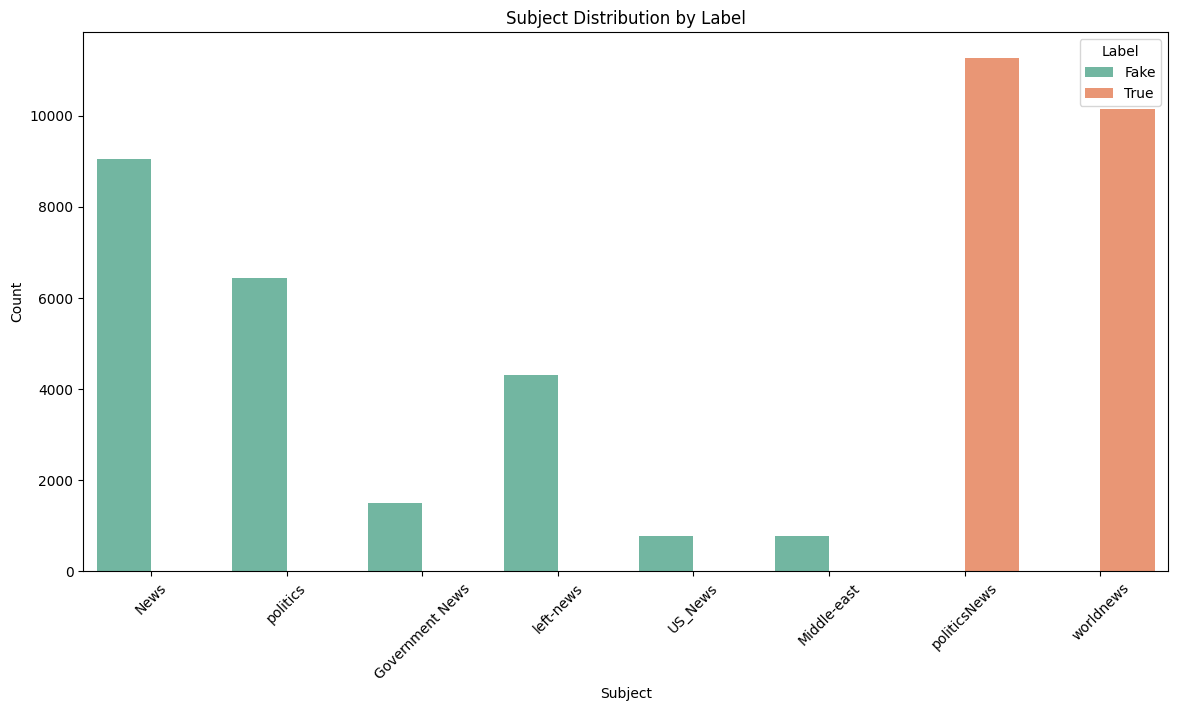

In [23]:
# Subject Distribution Comparison
plt.figure(figsize=(14, 7))
sns.countplot(data=pd.concat([fake, true], ignore_index=True), x='subject', hue='label', palette='Set2')
plt.title('Subject Distribution by Label')
plt.xticks(rotation=45)
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

Failed to parse date: https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/
Failed to parse date: https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/
Failed to parse date: https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/
Failed to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
Failed to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
Failed to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
Failed to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
Failed to parse date: MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps&He Couldnt Be More Wrong [Video]
Failed to parse date: https://fedu

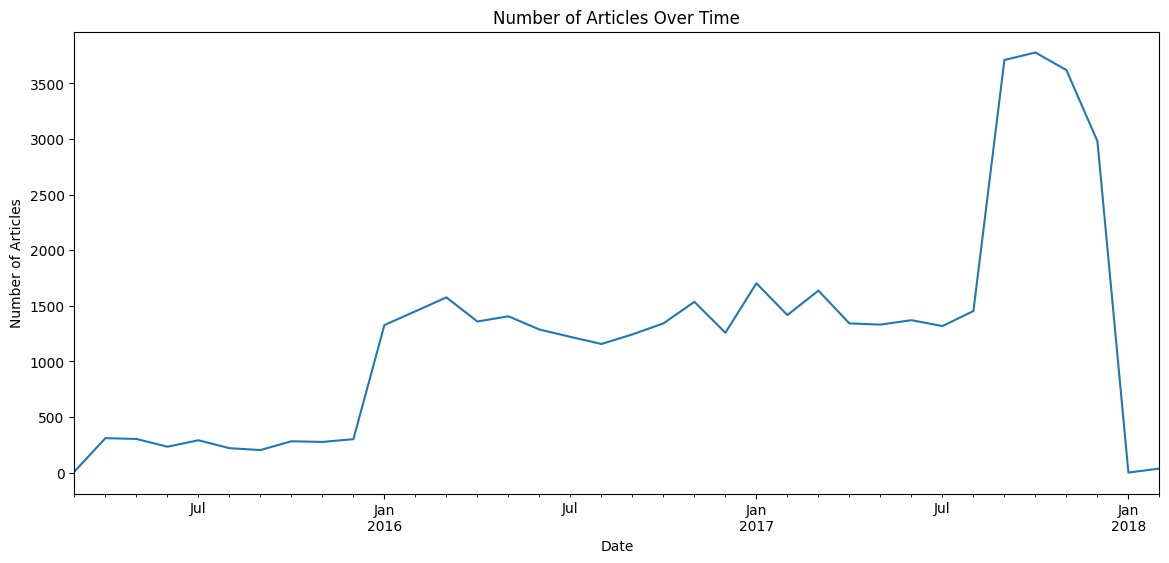

In [24]:
# Remove rows with invalid date entries
invalid_patterns = ["Clinton would win"]
for pattern in invalid_patterns:
    News = News[~News['date'].str.contains(pattern, na=False)]
    
# Time Series Analysis
def try_parsing_date(text):
    for fmt in ("%d-%b-%y", "%B %d, %Y", "%b %d, %Y"):  # Added an additional format
        try:
            return pd.to_datetime(text, format=fmt)
        except (ValueError, TypeError):
            continue
    print(f"Failed to parse date: {text}")
    return pd.NaT

News['date'] = News['date'].apply(try_parsing_date)

# Drop rows with null dates
News = News.dropna(subset=['date'])
News.set_index('date', inplace=True)

# Plot the number of articles over time
plt.figure(figsize=(14, 6))
News.resample('M').size().plot()
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


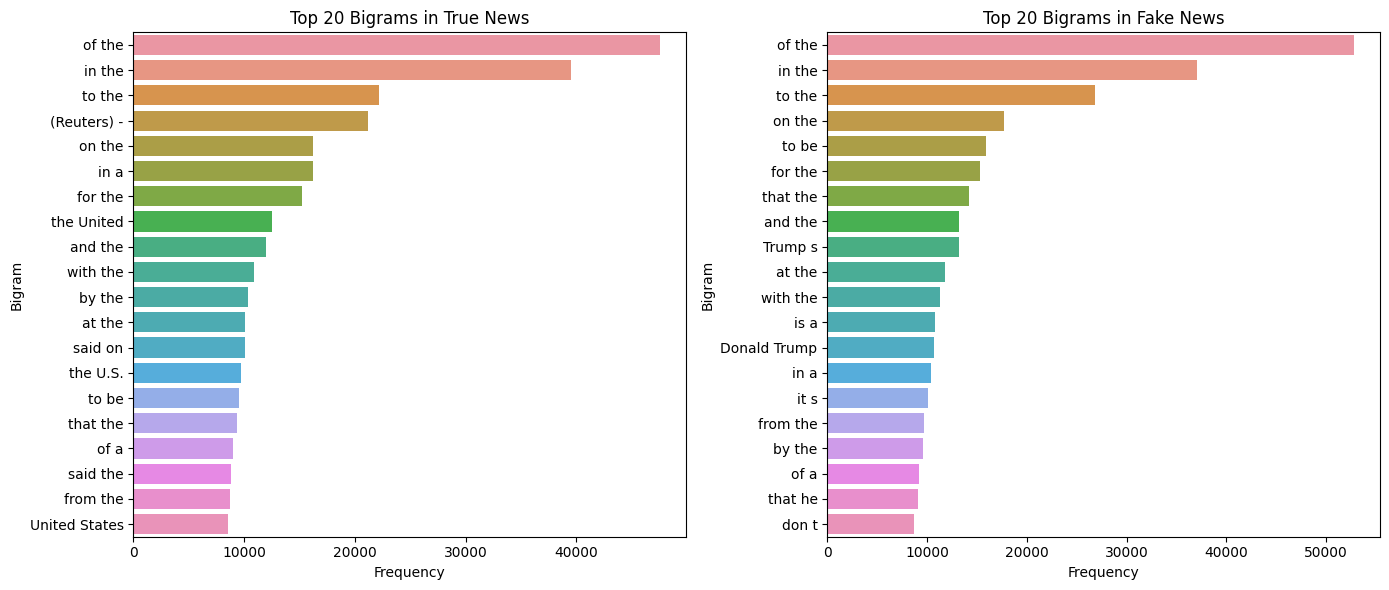

In [25]:
# Bigrams and Trigrams Analysis
def get_top_ngrams(corpus, n=2, top_k=20):
    tokens = " ".join(corpus).split()
    ngrams_list = list(ngrams(tokens, n))
    ngrams_freq = Counter(ngrams_list).most_common(top_k)
    return ngrams_freq

true_bigrams = get_top_ngrams(News[News['label'] == 'True']['text'], n=2)
fake_bigrams = get_top_ngrams(News[News['label'] == 'Fake']['text'], n=2)

true_bigrams_df = pd.DataFrame(true_bigrams, columns=['Bigram', 'Frequency'])
fake_bigrams_df = pd.DataFrame(fake_bigrams, columns=['Bigram', 'Frequency'])

# Convert tuples to strings for the 'Bigram' column
true_bigrams_df['Bigram'] = true_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))
fake_bigrams_df['Bigram'] = fake_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

# Plotting the bigram frequencies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(ax=axes[0], data=true_bigrams_df, x='Frequency', y='Bigram')
axes[0].set_title('Top 20 Bigrams in True News')

sns.barplot(ax=axes[1], data=fake_bigrams_df, x='Frequency', y='Bigram')
axes[1].set_title('Top 20 Bigrams in Fake News')

plt.tight_layout()
plt.show()

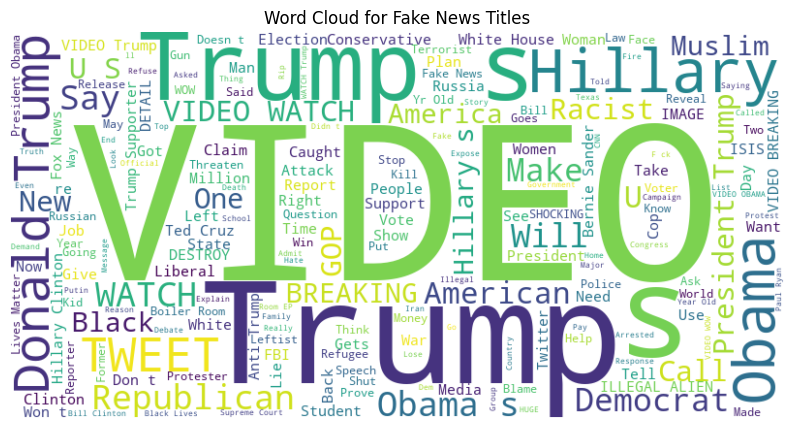

In [26]:
fake_titles = ' '.join(fake['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles')
plt.axis('off')
plt.show()

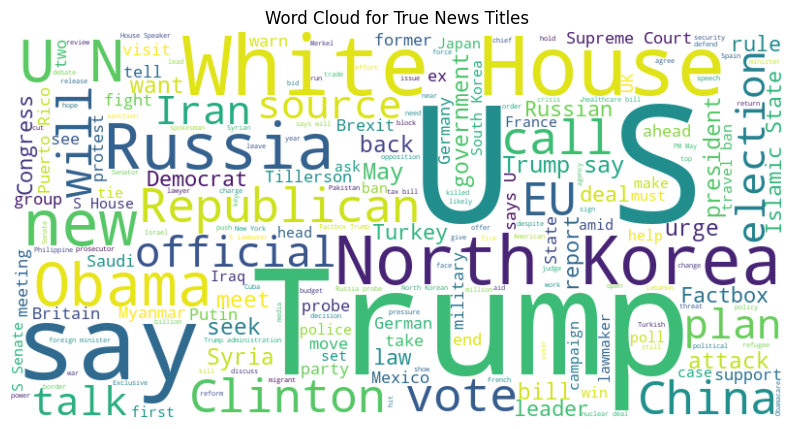

In [27]:
# Word cloud for true news titles
true_titles = ' '.join(true['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News Titles')
plt.axis('off')
plt.show()

## **3. MODEL BUILDING**

### **3.1 DATA PREPARINNG**

In [28]:
News.head()

,title,text,subject,label
date,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Years...,Donald Trump just couldn t wish all Americans ...,News,Fake
2017-12-31,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,Fake
2017-12-30,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,Fake
2017-12-29,Trump Is So Obsessed He Even Has Obamas Name ...,"On Christmas day, Donald Trump announced that ...",News,Fake
2017-12-25,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,Fake


In [29]:
# Reset the index to make 'date' a regular column, then drop it
# Reset the index to make 'date' a regular column, then drop it
News.reset_index(inplace=True)
news = News.drop(columns=["date","subject","title"], errors='ignore')

# Verify the DataFrame no longer has the 'date' column
print(news.head())



                                                text label
0  Donald Trump just couldn t wish all Americans ...  Fake
1  House Intelligence Committee Chairman Devin Nu...  Fake
2  On Friday, it was revealed that former Milwauk...  Fake
3  On Christmas day, Donald Trump announced that ...  Fake
4  Pope Francis used his annual Christmas Day mes...  Fake


In [30]:
news =news.sample(frac=1).reset_index(drop=True) # Shuffle the DataFrame   

In [31]:
news

,text,label
0,BANJUL (Reuters) - Gambia s Foreign Ministry s...,True
1,NEW YORK (Reuters) - Three women who have accu...,True
2,ISTANBUL (Reuters) - A Turkish court sentenced...,True
3,"Donald Trump likes feuds. He cannot, for any r...",Fake
4,ATHENS (Reuters) - Europe risks subjugation to...,True
...,...,...
44249,"On Tuesday, the Grammys announced their nomina...",Fake
44250,Don Lemon wasted? Doing shots on the air and g...,Fake
44251,The following statements were posted to the ve...,True
44252,Recall that in 2016 a Muslim professor was cau...,Fake


In [32]:
import re
import string

def wordopt(text):
    text = text.lower() # Convert text to lowercase     
    text = re.sub('\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove hyperlinks
    text = re.sub('<.*?>+', '', text) # Remove text in angle brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = re.sub('\n', '', text) # Remove line breaks
    text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    return text

In [33]:
news['text']=news['text'].apply(wordopt) # Apply the wordopt function to the 'text' column
news['text']

0        banjul reuters  gambia s foreign ministry said...
1        new york reuters  three women who have accused...
2        istanbul reuters  a turkish court sentenced a ...
3        donald trump likes feuds he cannot for any rea...
4        athens reuters  europe risks subjugation to ch...
                               ...                        
44249    on tuesday the grammys announced their nominat...
44250    don lemon wasted doing shots on the air and ge...
44251    the following statements were posted to the ve...
44252    recall that in  a muslim professor was caught ...
44253    on saturday green party candidate jill stein w...
Name: text, Length: 44254, dtype: object

In [34]:
x=news['text']
y=news['label']

In [35]:
x

0        banjul reuters  gambia s foreign ministry said...
1        new york reuters  three women who have accused...
2        istanbul reuters  a turkish court sentenced a ...
3        donald trump likes feuds he cannot for any rea...
4        athens reuters  europe risks subjugation to ch...
                               ...                        
44249    on tuesday the grammys announced their nominat...
44250    don lemon wasted doing shots on the air and ge...
44251    the following statements were posted to the ve...
44252    recall that in  a muslim professor was caught ...
44253    on saturday green party candidate jill stein w...
Name: text, Length: 44254, dtype: object

### **3.2 DATA SPLITTING**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape # Verify the shapes

((35403,), (8851,), (35403,), (8851,))

In [38]:
vectorisation =  TfidfVectorizer() # Convert a collection of raw documents to a matrix of TF-IDF features

## **4. MODEL EVALUATION**

In [39]:
xv_train = vectorisation.fit_transform(x_train) # Fit and transform the training data
xv_test = vectorisation.transform(x_test) # Only transform the test data

In [40]:
xv_train,xv_test

(<35403x179050 sparse matrix of type '<class 'numpy.float64'>'
 	with 7319631 stored elements in Compressed Sparse Row format>,
 <8851x179050 sparse matrix of type '<class 'numpy.float64'>'
 	with 1813083 stored elements in Compressed Sparse Row format>)

### **4.0 LOGISTIC REGRESSION**

In [41]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
LR = LogisticRegression()
LR.fit(xv_train,y_train)

y_pred = LR.predict(xv_test)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("Accuracy: ", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy:  0.9857643204157722

Confusion Matrix:
 [[4469   77]
 [  49 4256]]

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4546
        True       0.98      0.99      0.99      4305

    accuracy                           0.99      8851
   macro avg       0.99      0.99      0.99      8851
weighted avg       0.99      0.99      0.99      8851



### **4.1 RANDOM FOREST CLASSIFIER**

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train the Random Forest Classifier
RF = RandomForestClassifier(random_state=42, n_estimators=100)
RF.fit(xv_train, y_train)

# Predict on the test set
y_pred = RF.predict(xv_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy*100:.1f}")
print("\nClassification Report:\n", class_report)


Accuracy: 98.6

Classification Report:
               precision    recall  f1-score   support

        Fake       0.98      0.99      0.99      4546
        True       0.99      0.98      0.99      4305

    accuracy                           0.99      8851
   macro avg       0.99      0.99      0.99      8851
weighted avg       0.99      0.99      0.99      8851



### **4.2 XGBOOST**

In [43]:
from xgboost import XGBClassifier

# Convert labels to integers
y_train_int = y_train.map({'True': 1, 'Fake': 0})
y_test_int = y_test.map({'True': 1, 'Fake': 0})

XGB = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train_int) - sum(y_train_int)) / sum(y_train_int))
XGB.fit(xv_train, y_train_int)
y_pred = XGB.predict(xv_test)

# Evaluate the model
accuracy = accuracy_score(y_test_int, y_pred)
conf_matrix = confusion_matrix(y_test_int, y_pred)
class_report = classification_report(y_test_int, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy*100:.1f}")
print("\nClassification Report:\n", class_report)


Accuracy: 99.7

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4546
           1       1.00      1.00      1.00      4305

    accuracy                           1.00      8851
   macro avg       1.00      1.00      1.00      8851
weighted avg       1.00      1.00      1.00      8851



###### **4.3 DECISIONTREE CLASSIFIER**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train the Decision Tree Classifier
DTF = DecisionTreeClassifier(random_state=42)
DTF.fit(xv_train, y_train_int)

# Predict on the test set
y_pred = DTF.predict(xv_test)

# Evaluate the model
accuracy = accuracy_score(y_test_int, y_pred)
conf_matrix = confusion_matrix(y_test_int, y_pred)
class_report = classification_report(y_test_int, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy*100:.1f}")
print("\nClassification Report:\n", class_report)

Accuracy: 99.5

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4546
           1       0.99      1.00      1.00      4305

    accuracy                           1.00      8851
   macro avg       1.00      1.00      1.00      8851
weighted avg       1.00      1.00      1.00      8851



## **4.2 ROC CURVE**

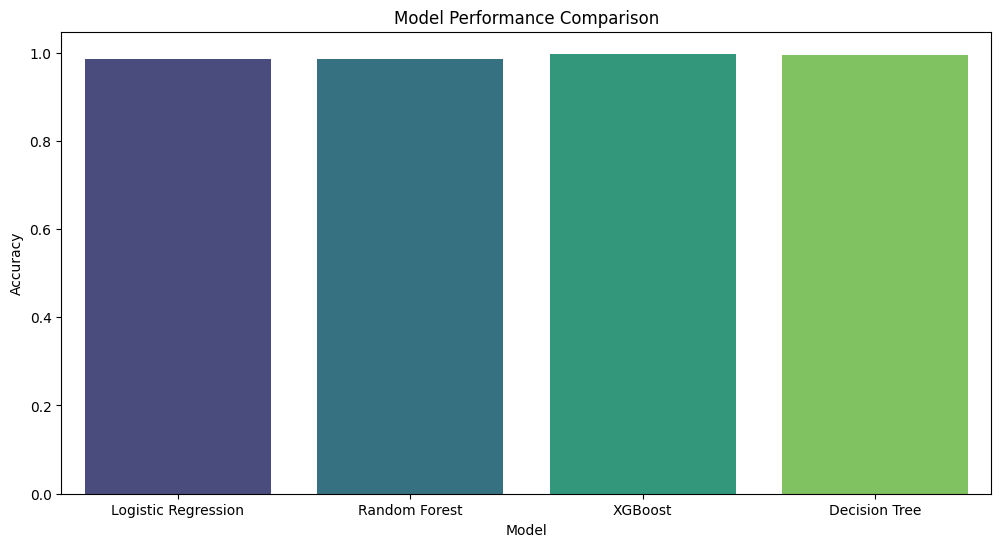

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score


# Collecting the accuracy scores
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree']
accuracies = [accuracy_score(y_test, LR.predict(xv_test)),
              accuracy_score(y_test, RF.predict(xv_test)),
              accuracy_score(y_test_int, XGB.predict(xv_test)),
              accuracy_score(y_test_int, DTF.predict(xv_test))]

# Plotting the bar chart for model accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()



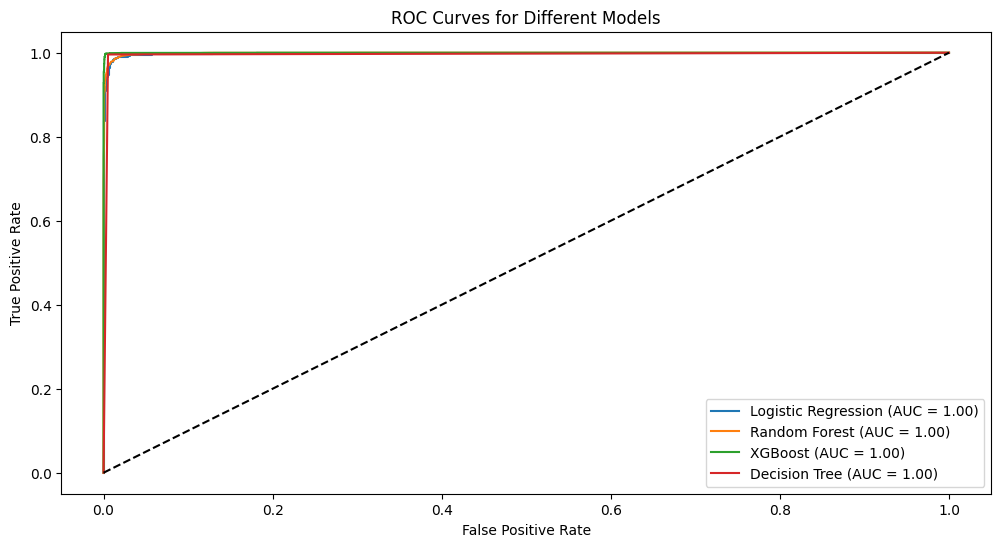

In [46]:
# Plotting the ROC curves
plt.figure(figsize=(12, 6))

# Logistic Regression
y_pred_prob = LR.predict_proba(xv_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='True')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')

# Random Forest
y_pred_prob = RF.predict_proba(xv_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='True')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')

# XGBoost
y_pred_prob = XGB.predict_proba(xv_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_int, y_pred_prob)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test_int, y_pred_prob):.2f})')

# Decision Tree
y_pred_prob = DTF.predict_proba(xv_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_int, y_pred_prob)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test_int, y_pred_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **5. DEPLOYMENT**

In [47]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups

# Example data
data = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'])
X_train = data.data
y_train = data.target

# Vectorize the data
vectorisation = TfidfVectorizer()
X_train_vectorized = vectorisation.fit_transform(X_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Save the vectorizer and model
joblib.dump(vectorisation, 'vectorizer.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']